In [1]:
import numpy as np
import cv2

In [2]:
# 0是灰色，1是彩色
img = cv2.imread("test.jpg", 1)

In [3]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

显示

In [4]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

保存（可以转化格式）

In [7]:
cv2.imwrite('test.png', img)

True

实例

In [1]:
import numpy as np
import cv2
img = cv2.imread('test.jpg', 0)
cv2.imshow('image', img)
k = cv2.waitKey(0)
if k==27:
    cv2.destroyAllWindows()
elif k==ord('s'):
    cv2.imwrite('test.png', img)
    cv2.destroyAllWindows()

使用matplotlib

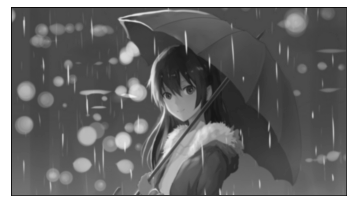

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('test.jpg', 0)
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

## 视频

In [3]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

保存视频

In [23]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))

while cap.isOpened():
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame, 180)
        out.write(frame)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

## 绘图

In [11]:
import numpy as np
import cv2
img = np.zeros((512,512,3), np.uint8)
# 画线：左上角顶点坐标、右下角顶点坐标、BGR、粗细
cv2.line(img, (0,0), (511,511), (255,0,0), 3)
# 画矩形
cv2.rectangle(img, (100,100), (200,200), (0,255,0), 3)
# 画圆：中心坐标、半径、BGR、粗细
cv2.circle(img, (300,300), 50, (0,0,255), -1)
# 画椭圆：
cv2.ellipse(img, (256, 256), (100,50), 0, 0, 180, (255,255,255), -1)
# 画多边形
pts = np.array([[10,5], [20,30], [70,20], [50,10]], np.int32)
pts.reshape((-1,1,2))
cv2.polylines(img, [pts], True, (0,255,255), 2)
# 写字
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 'hello', (80,80), font, 0.8, (255,255,255), 2)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
import cv2
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


画笔

In [1]:
import numpy as np
import cv2
img = np.zeros((512, 512,3),np.uint8)
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img, (x,y), 100, (255,255,0), -1)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while 1:
    cv2.imshow('image', img)
    if cv2.waitKey(20) & 0xFF==27:
        break
cv2.destroyAllWindows()

In [2]:
import numpy as np
import cv2

drawing = False
mode = True
ix, iy = -1, -1

def draw_circle(event, x, y, flags, param):
    global ix, iy, mode, drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
    elif event == cv2.EVENT_MOUSEMOVE and flags==cv2.EVENT_FLAG_LBUTTON:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img, (ix,iy), (x,y), (0,255,0),1)
            else:
                cv2.circle(img, (x,y), 3, (0,0,255), -1)
    
    # 鼠标松开停止绘画
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)
while 1:
    cv2.imshow('image', img)
    k = cv2.waitKey(1)&0xFF
    # 切换模式
    if k == ord('m'):
        mode = not mode
    elif k==27:
        break
cv2.destroyAllWindows()

In [8]:
import cv2
import numpy as np

def nothing(x):
    pass
# 创建一副黑色图像
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

cv2.createTrackbar('R', 'image', 0, 255, nothing)
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('B', 'image', 0, 255, nothing)
switch = '0:OFF\n1:ON'
cv2.createTrackbar(switch, 'image', 0, 1, nothing)

while 1:
    cv2.imshow('image', img)
    k = cv2.waitKey(1)&0xFF
    if k==27:
        break
    r = cv2.getTrackbarPos('R', 'image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')
    s = cv2.getTrackbarPos(switch, 'image')
    if s==0:
        img[:] = 0
    else:
        img[:] = [b, g, r]
    
cv2.destroyAllWindows()

In [9]:
import numpy as np
import cv2

drawing = False
# r, g, b = 0, 0, 0
def fun(x):
    pass
def draw_circle(event, x, y, flags, param):
    global drawing, r, g, b
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE and flags == cv2.EVENT_FLAG_LBUTTON:
        if drawing == True:
            cv2.circle(img, (x,y), 2, (b,g,r), -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

img = np.zeros((512,512), np.uint8)
cv2.namedWindow('image')
cv2.createTrackbar('R', 'image', 0, 255, fun)
cv2.createTrackbar('G', 'image', 0, 255, fun)
cv2.createTrackbar('B', 'image', 0, 255, fun)
cv2.setMouseCallback('image', draw_circle)

while 1:
    cv2.imshow('image', img)
    r = cv2.getTrackbarPos('R', 'image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')
    k = cv2.waitKey(1)&0xFF
    if k==27:
        break
    
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass
drawing = False
